In [1]:
import requests

In [4]:
apiEndPoints = {
    "album": r"https://api.deezer.com/album/{0}",
    "artist": r"https://api.deezer.com/artist/{0}",
    "track": r"https://api.deezer.com/track/{0}"    
}

In [16]:
access_token = "frBx6ZdRjE553f9dc2a3cc9P7JptufC553f9dc2a3d00hX24wk"

In [12]:
def get_item_from_api(itemType, itemId):
    r = requests.get(url = apiEndPoints[itemType].format(itemId))
    return r.json()

In [13]:
get_item_from_api("artist", 27)

{'id': 27,
 'link': 'https://www.deezer.com/artist/27',
 'name': 'Daft Punk',
 'nb_album': 30,
 'nb_fan': 3025968,
 'picture': 'https://api.deezer.com/artist/27/image',
 'picture_big': 'https://cdns-images.dzcdn.net/images/artist/f2bc007e9133c946ac3c3907ddc5d2ea/500x500-000000-80-0-0.jpg',
 'picture_medium': 'https://cdns-images.dzcdn.net/images/artist/f2bc007e9133c946ac3c3907ddc5d2ea/250x250-000000-80-0-0.jpg',
 'picture_small': 'https://cdns-images.dzcdn.net/images/artist/f2bc007e9133c946ac3c3907ddc5d2ea/56x56-000000-80-0-0.jpg',
 'radio': True,
 'share': 'http://www.deezer.com/artist/27?utm_source=deezer&utm_content=artist-27&utm_term=0_1454754910&utm_medium=web',
 'tracklist': 'https://api.deezer.com/artist/27/top?limit=50',
 'type': 'artist'}

In [21]:
def get_history():
    url = r"http://api.deezer.com/user/me/history?access_token=" + access_token
    return requests.get(url = url).json()

In [22]:
get_history()

{'data': [{'album': {'cover': 'http://api.deezer.com/album/10506072/image',
    'cover_big': 'http://cdn-images.deezer.com/images/cover/4288439f650f1f592121011c44c7ca85/500x500-000000-80-0-0.jpg',
    'cover_medium': 'http://cdn-images.deezer.com/images/cover/4288439f650f1f592121011c44c7ca85/250x250-000000-80-0-0.jpg',
    'cover_small': 'http://cdn-images.deezer.com/images/cover/4288439f650f1f592121011c44c7ca85/56x56-000000-80-0-0.jpg',
    'id': 10506072,
    'link': 'http://www.deezer.com/album/10506072',
    'title': 'Drones',
    'tracklist': 'http://api.deezer.com/album/10506072/tracks',
    'type': 'album'},
   'artist': {'id': 705,
    'link': 'http://www.deezer.com/artist/705',
    'name': 'Muse',
    'tracklist': 'http://api.deezer.com/artist/705/top?limit=50',
    'type': 'artist'},
   'duration': 245,
   'explicit_lyrics': False,
   'id': 101215858,
   'link': 'http://www.deezer.com/track/101215858',
   'preview': 'http://e-cdn-preview-a.deezer.com/stream/a53d239a2ec0a4135c

In [23]:
from collections import namedtuple

In [24]:
Listen = namedtuple('Listen', ['song_name', 'album_name', 'artist_name', "timestamp"], verbose=True)

from builtins import property as _property, tuple as _tuple
from operator import itemgetter as _itemgetter
from collections import OrderedDict

class Listen(tuple):
    'Listen(song_name, album_name, artist_name, timestamp)'

    __slots__ = ()

    _fields = ('song_name', 'album_name', 'artist_name', 'timestamp')

    def __new__(_cls, song_name, album_name, artist_name, timestamp):
        'Create new instance of Listen(song_name, album_name, artist_name, timestamp)'
        return _tuple.__new__(_cls, (song_name, album_name, artist_name, timestamp))

    @classmethod
    def _make(cls, iterable, new=tuple.__new__, len=len):
        'Make a new Listen object from a sequence or iterable'
        result = new(cls, iterable)
        if len(result) != 4:
            raise TypeError('Expected 4 arguments, got %d' % len(result))
        return result

    def _replace(_self, **kwds):
        'Return a new Listen object replacing specified fields with new values'
        result = _self._mak

In [25]:
example = Listen("Defector", "Drones", "Muse", 1)

In [26]:
example.song_name

'Defector'

In [41]:
def process_history(data):
    return [Listen(item["title"], item["album"]["title"], item["artist"]["name"], item["timestamp"]) for item in data["data"]]

In [37]:
historyExample = get_history()

In [47]:
listenHistory = process_history(historyExample)

In [43]:
import numpy as np
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from collections import Counter

In [54]:
timestamps = [x.timestamp for x in listenHistory]
artists = [x.artist_name for x in listenHistory]

Counter({'Ash': 1,
         'Fleetwood Mac': 16,
         'Imagine Dragons': 5,
         'Muse': 24,
         'Radiohead': 1,
         'Train': 1,
         'Walk The Moon': 1,
         'ZEDD': 1})

In [60]:
def display_pie_chart(listenHistory):
    artists = [x.artist_name for x in listenHistory]
    counter = Counter(artists)
    counter.items()
    artists, count = [x[0] for x in counter.items()], [x[1] for x in counter.items()]
    plt.pie(count, labels = artists)

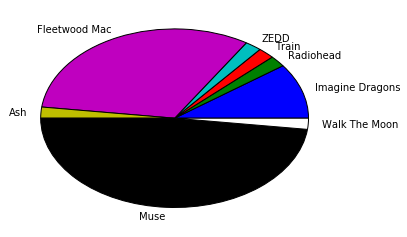

In [61]:
display_pie_chart(listenHistory)